In [2]:
import tensorflow as tf

# Create a random tensor of shape (4, 6)
tensor = tf.random.uniform(shape=(4, 6))
print("Original Tensor:\n", tensor)

# Rank and shape
rank = tf.rank(tensor)
shape = tf.shape(tensor)
print("Rank:", rank.numpy())
print("Shape:", shape.numpy())

# Reshape to (2, 3, 4)
reshaped_tensor = tf.reshape(tensor, (2, 3, 4))
print("\nReshaped Tensor (2, 3, 4):\n", reshaped_tensor)

# Transpose to (3, 2, 4)
transposed_tensor = tf.transpose(reshaped_tensor, perm=[1, 0, 2])
print("\nTransposed Tensor (3, 2, 4):\n", transposed_tensor)

# Broadcasting a smaller tensor (1, 4) to match (3, 2, 4)
small_tensor = tf.constant([[1.0, 2.0, 3.0, 4.0]])
broadcasted_tensor = tf.broadcast_to(small_tensor, [3, 2, 4])
print("\nBroadcasted Tensor (3, 2, 4):\n", broadcasted_tensor)

# Add tensors
result = transposed_tensor + broadcasted_tensor
print("\nResult of Addition:\n", result)


Original Tensor:
 tf.Tensor(
[[0.6558249  0.16685069 0.6417681  0.27634907 0.5213963  0.23992395]
 [0.5573199  0.70635104 0.5286797  0.38130927 0.74237347 0.837981  ]
 [0.2563219  0.20957923 0.3909874  0.27152812 0.18580806 0.64993167]
 [0.38932788 0.24519837 0.45843804 0.10600007 0.10215783 0.58030844]], shape=(4, 6), dtype=float32)
Rank: 2
Shape: [4 6]

Reshaped Tensor (2, 3, 4):
 tf.Tensor(
[[[0.6558249  0.16685069 0.6417681  0.27634907]
  [0.5213963  0.23992395 0.5573199  0.70635104]
  [0.5286797  0.38130927 0.74237347 0.837981  ]]

 [[0.2563219  0.20957923 0.3909874  0.27152812]
  [0.18580806 0.64993167 0.38932788 0.24519837]
  [0.45843804 0.10600007 0.10215783 0.58030844]]], shape=(2, 3, 4), dtype=float32)

Transposed Tensor (3, 2, 4):
 tf.Tensor(
[[[0.6558249  0.16685069 0.6417681  0.27634907]
  [0.2563219  0.20957923 0.3909874  0.27152812]]

 [[0.5213963  0.23992395 0.5573199  0.70635104]
  [0.18580806 0.64993167 0.38932788 0.24519837]]

 [[0.5286797  0.38130927 0.74237347 0.83

Loss values for prediction 1 - MSE: 0.04666667 CCE: 0.35667497
Loss values for prediction 2 - MSE: 0.011666666 CCE: 0.1625189


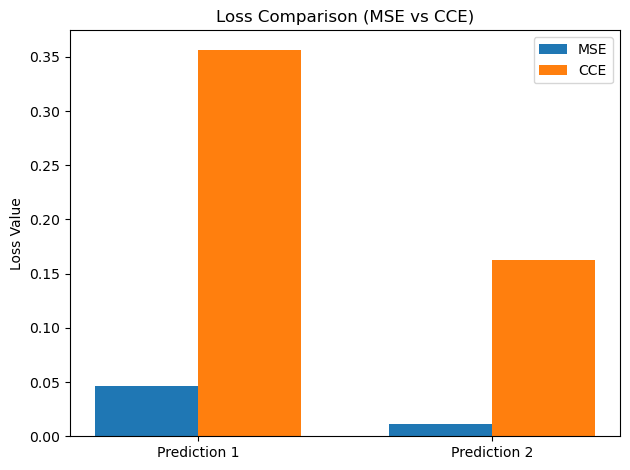

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.losses import MeanSquaredError, CategoricalCrossentropy

# Define true and predicted values
y_true = np.array([[0, 1, 0]])
y_pred1 = np.array([[0.2, 0.7, 0.1]])
y_pred2 = np.array([[0.1, 0.85, 0.05]])

# Initialize loss functions
mse = MeanSquaredError()
cce = CategoricalCrossentropy()

# Compute loss values
mse1 = mse(y_true, y_pred1).numpy()
cce1 = cce(y_true, y_pred1).numpy()

mse2 = mse(y_true, y_pred2).numpy()
cce2 = cce(y_true, y_pred2).numpy()

print("Loss values for prediction 1 - MSE:", mse1, "CCE:", cce1)
print("Loss values for prediction 2 - MSE:", mse2, "CCE:", cce2)

# Plot
labels = ['Prediction 1', 'Prediction 2']
mse_values = [mse1, mse2]
cce_values = [cce1, cce2]

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots()
ax.bar(x - width/2, mse_values, width, label='MSE')
ax.bar(x + width/2, cce_values, width, label='CCE')

ax.set_ylabel('Loss Value')
ax.set_title('Loss Comparison (MSE vs CCE)')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.tight_layout()
plt.show()


In [7]:
import tensorflow as tf
from tensorflow.keras import layers, models
import datetime

# Load and preprocess MNIST
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train = x_train / 255.0
x_test = x_test / 255.0

# Build model
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# TensorBoard logging
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

# Train
model.fit(x_train, y_train,
          epochs=5,
          validation_data=(x_test, y_test),
          callbacks=[tensorboard_callback])


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


C:\Users\91944\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.8750 - loss: 0.4338 - val_accuracy: 0.9604 - val_loss: 0.1340
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9653 - loss: 0.1173 - val_accuracy: 0.9718 - val_loss: 0.0948
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9761 - loss: 0.0776 - val_accuracy: 0.9702 - val_loss: 0.0933
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9830 - loss: 0.0593 - val_accuracy: 0.9742 - val_loss: 0.0842
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9861 - loss: 0.0454 - val_accuracy: 0.9772 - val_loss: 0.0765
